In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# LINEAR HYPOTHESIS FUNCTION (x and theta 1D matrices)

In [2]:
# x shape is (a,b)
# theta shape is (b,1)
# x matrix includes bias term x_0
# a - number of samples
# b - number of features
def h(x,theta):
    theta = theta.reshape(x.shape[1],1)
#     theta = theta.T
#     print(x.shape)
#     print(theta.shape)
    y_pred = np.dot(x,theta)
#     print(y_pred.shape)
    return y_pred

##### EXAMPLE

In [3]:
x = np.array([[1,1],[1,3],[1,5]])
theta = np.array([1,2])
# print(x.shape)
hypothesis_result = h(x,theta)
print(hypothesis_result)

[[ 3]
 [ 7]
 [11]]


# MEAN SQUARED ERROR

In [4]:
def mean_squared_error(y_pred, y_label):
    y_pred = y_pred[np.newaxis]
    y_label = y_label[np.newaxis]
    residuals = y_pred - y_label
    cost = []
    m = y_pred.shape[1]
#     print(y_pred)
#     print(y_pred.shape)
#     print(residuals)
    cost.append((np.sum(residuals**2))/(m))
    return cost

##### EXAMPLE

In [5]:
#test for mean squared error
#http://www.alcula.com/calculators/statistics/linear-regression/#gsc.tab=0
# data is (43,41),(44,45),(45,49),(46,47),(47,44)
# regression line y= 9.2 + 0.8x.
# MSE is 6.08

y_pred = np.array([43.6,44.4,45.2,46,46.8])
y = np.array([41,45,49,47,44])

MSE_result = mean_squared_error(y_pred,y)
print(MSE_result)
    


[6.079999999999994]


# Closed-Form Solution

In [6]:
class LeastSquaresRegression():
    def __init__(self,):
        self.theta_ = None  
        
    def fit(self, X, y):
        # Calculates theta that minimizes the MSE and updates self.theta_
        self.theta_  = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
#         print(X.shape)
#         print(y.shape)
#         print(self.theta_.shape)
        
    def predict(self, X):
        # Make predictions for data X, i.e output y = h(X) (See equation in Introduction)
        return h(X,self.theta_)

# Data generation and plot

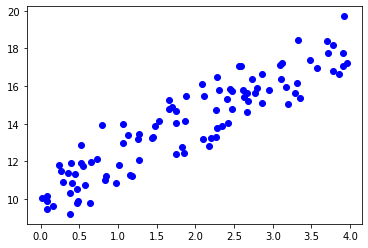

In [7]:
np.random.seed(0) # to keep inital random constant
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)
plt.scatter(X,y,color='blue')
plt.show()

# Add bias term x_0 = 1

In [8]:
def bias_column(X):
    m = X.shape[0]
    X = np.c_[np.ones((m,1)),X]
    return X

X_new = bias_column(X)

print(X[:5])
print(" ---- ")
print(X_new[:5])

[[2.19525402]
 [2.86075747]
 [2.4110535 ]
 [2.17953273]
 [1.6946192 ]]
 ---- 
[[1.         2.19525402]
 [1.         2.86075747]
 [1.         2.4110535 ]
 [1.         2.17953273]
 [1.         1.6946192 ]]


# Calculate the weights with the LeastSquaresRegression class

In [9]:
model = LeastSquaresRegression()
model.fit(X_new, y)
print(model.theta_)

[[10.22215108]
 [ 1.98423376]]


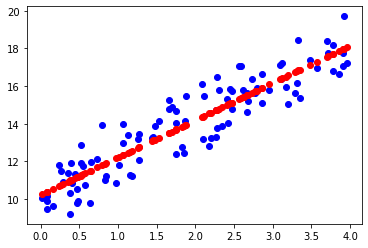

In [10]:
y_new = model.predict(X_new)

def my_plot(X, y, y_new):
    plt.scatter(X,y,color='b')
    plt.scatter(X,y_new,color='r')
    plt.show()

my_plot(X, y, y_new)

# GRADIENT DESCENT

In [11]:
class GradientDescentOptimizer():
    def __init__(self, f, fprime, start, learning_rate = 0.1):
        self.f_      = f                       # The function
        self.fprime_ = fprime                  # The gradient of f
        self.current_ = start                  # The current point being evaluated
        self.learning_rate_ = learning_rate    # Does this need a comment ?
        
        # Save history as attributes
        self.history_ = [start]
        
    def step(self):
        # Take a gradient descent step
        # 1. Compute the new value and update selt.current_
        # 2. Append the new value to history
        # Does not return anything
#         print(self.current_)
        new_value = self.current_ - (self.learning_rate_ * fprime(self.current_))
        self.current_ = new_value
        self.history_.append(self.current_)
#         print(self.current_)
        return

        
    def optimize(self, iterations = 100):
        # Use the gradient descent to get closer to the minimum:
        # For each iteration, take a gradient step
        for i in range(iterations):
            self.step()
        return

            
    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))
#         print(self.history_)


#f(x) = 3 + (x - (2  6)T)T · (x - (2  6)T)
#h = (2 6)T
#u(x) = (x - (2  6)T)T
#g(x) = (x - (2  6)T)
def f(x):
#     x = x.reshape(x.shape[0],1)
#     print(x.shape)
    h = np.array([2,6])
#     print(h.shape)
#     h = h.reshape(h.shape[0],1)
    u = (x - h).T
    g = (x - h)
    res = np.add(3,np.dot(u,g))
    return res

#f(x) = 3 + (x - (2  6)T)T · (x - (2  6)T) 
#f'(x) = 2x - (4 12)T
def fprime(x):
#     print(x)
#     x = x.reshape(x.shape[0],1)
    h = (np.array([4,12])).T
#     h = h.reshape(h.shape[0],1)
    res = np.subtract(2*x,h)
    return res

grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), 0.1)
grad.optimize()
grad.print_result()

Best theta found is [2. 6.]
Value of f at this theta: f(theta) = 3.0
Value of f prime at this theta: f'(theta) = [-9.59034629e-10 -3.00460989e-09]


## Plot the function f in 3D

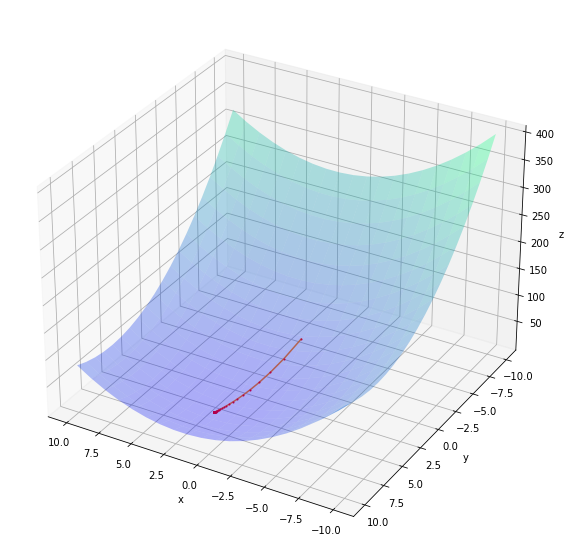

In [12]:
def z(x,y):
    return 3 + (x-2)**2 + (y-6)**2

x = np.linspace(-10,10,20)
y = np.linspace(-10,10,20)

X,Y = np.meshgrid(x,y)
Z = z(X,Y)

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,alpha=0.3,cmap='winter')

ax.plot([t[0] for t in grad.history_], [t[1] for t in grad.history_], [f(t) for t in grad.history_] , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.view_init(30, 120)
plt.show()

# Gradient Descent for Linear Regression


In [13]:
def gradient_descent(X, m, y, theta_start, iterations = 100, learning_rate = 0.1):
    theta = theta_start
    for _ in range(iterations):
        y_pred = np.dot(X,theta)
        residuals = np.subtract(y_pred,y)
        gradient_vector = np.dot(X.T,residuals)
#         print(y_pred.shape)
#         print(residuals.shape)
#         print(gradient_vector.shape)
#         print(theta.shape)
        theta -= (learning_rate/m)*gradient_vector
    return theta,y_pred

In [14]:
np.random.seed(0) # to keep inital random constant
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)

X_new = bias_column(X)
# print(X.shape)
# print(y.shape)

theta_start = np.zeros((X_new.shape[1],1))
# print(theta_start.shape)

[[9.46757957]
 [2.28967862]]


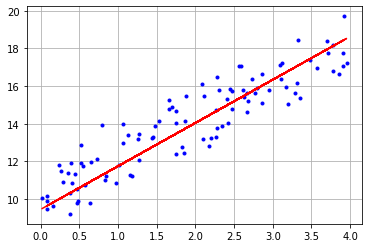

In [15]:
theta,y_pred = gradient_descent(X_new, 100, y, theta_start)
print(theta)
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-")
plt.grid()

[[9.50218673]
 [2.2756699 ]]


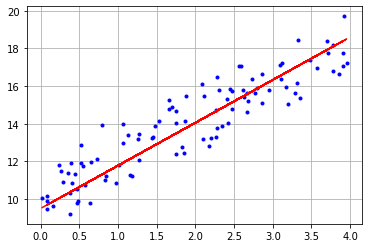

In [16]:
theta,y_pred = gradient_descent(X_new, 100, y, theta_start, 20, 0.01)
print(theta)
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-")
plt.grid()

[[9.77420008]
 [2.16556094]]


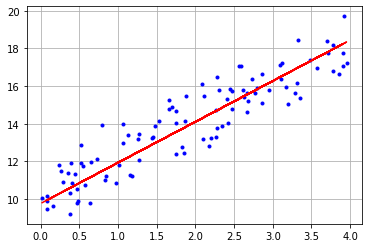

In [17]:
theta,y_pred = gradient_descent(X_new, 100, y, theta_start, 20, 0.1)
print(theta)
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-")
plt.grid()

[[10.20973328]
 [ 1.98926014]]


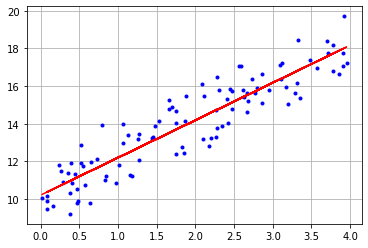

In [18]:
theta,y_pred = gradient_descent(X_new, 100, y, theta_start, 20, 0.7)
print(theta)
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-")
plt.grid()